#### Root-finding algorithms

In [33]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Functions

In [56]:
f = [
  lambda x: np.power(x,10) - 1, 
  lambda x: np.exp(x) - 3 * x, 
  lambda x: np.power(x,3) - (9 * x) + 5,
  lambda x: 2 * np.power(x,3) + (5 * np.power(x,2)) - (8 * x) - 1,
  ]

##### Auxiliar Function

In [95]:
def plot_func(f, x_min, x_max, n, points):
  x = np.linspace(x_min, x_max, n)
  y = np.array([f(i) for i in x])
  plt.figure(dpi=120)
  plt.plot(x, y)
  plt.plot(points[0], points[1], 'ro')
  plt.grid(True)
  plt.show()

##### Bissection Method

In [134]:
def bissec(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a + b) / 2

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': M, 'f(a)*f(x)': f(a)*f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = (a + b) / 2
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': f(a), 'f(a)*f(x)': f(a)*f(x)}, ignore_index=True)

    k += 1

  print(f'Root: {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])

  return df

 

Root: -0.0099, Iterations: 5
<function <lambda> at 0x7f84ea822550> 0.5 1.0 100           x      f(x)
0  0.750000 -1.328125
1  0.625000 -0.380859
2  0.562500  0.115479
3  0.593750 -0.134430
4  0.578125 -0.009899


KeyError: 0

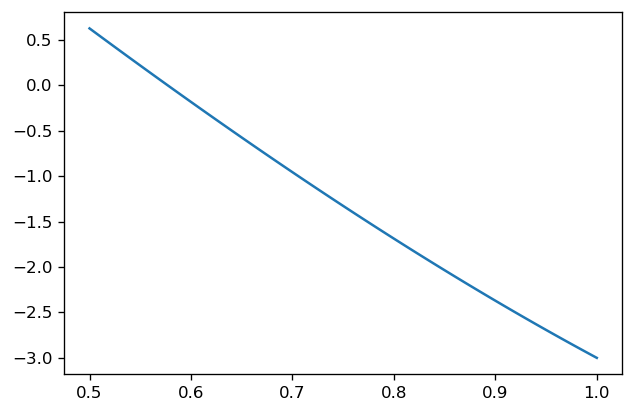

In [136]:
bissec(0.5, 1, 0.01, 5, f[2])

##### False Position Method

In [58]:
def false_position(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a * f(b)) - (b * f(a)) / (f(b) - f(a))

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = a * f(b) - b * f(a) / (f(b) - f(a))
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x)}, ignore_index=True)

    k += 1
  
  print(f'Root: {round(f(x), 4)}, Iterations: {k}')
  return df

##### Results

In [105]:
bissec(0.5, 1, 0.01, 5, f[2])

Root: -0.0099, Iterations: 5
0.5


,a,b,x,f(x),f(a),f(a)*f(x)
0,0.5000,1.00000,0.750000,-1.328125,0.625000,-0.830078
1,0.5000,0.75000,0.625000,-0.380859,0.625000,-0.238037
2,0.5000,0.62500,0.562500,0.115479,0.625000,0.072174
3,0.5625,0.62500,0.593750,-0.134430,0.115479,-0.015524
4,0.5625,0.59375,0.578125,-0.009899,0.115479,-0.001143


In [60]:
false_position(0, 1, 0.0005, 5, f[2])

Root: -0.0002, Iterations: 4


,a,b,x,f(x)
0,0.0,1.000000,0.625000,-0.380859
1,0.0,0.625000,0.580762,-0.030978
2,0.0,0.580762,0.577186,-0.002390
3,0.0,0.577186,0.576910,-0.000184


In [59]:
false_position(0, 3, 0.05, 5, f[3])

Root: 120.5802, Iterations: 5


,a,b,x,f(x)
0,0.00,3.000000,0.040000,-1.311872
1,0.04,3.000000,3.012258,74.935035
2,0.04,3.012258,3.049229,77.797386
3,0.04,3.049229,3.162461,86.962658
4,0.04,3.162461,3.525505,120.580152
